##### 지역별 온도데이터 
https://data.kma.go.kr/

In [52]:
import pandas as pd

In [69]:
try:
    df = pd.read_csv('400_20200411221745769.csv')
except  OSError as err:
    print("OS error: {0}".format(err))
df.head()

,format: day,hour,value location:63_108 Start : 20190401
0,1,0.0,8.1
1,1,100.0,8.8
2,1,200.0,8.3
3,1,300.0,9.8
4,1,400.0,9.5


In [70]:
df.columns

Index([' format: day', 'hour', 'value location:63_108 Start : 20190401 '], dtype='object')

In [71]:
df = df.rename(columns={'value location:63_108 Start : 20190401 ': 'temp',  ' format: day' : 'day'})

In [72]:
df.describe()

,hour,temp
count,8784.000000,8784.000000
mean,1150.000000,12.549966
std,692.258061,10.702835
min,0.000000,-50.000000
25%,575.000000,3.800000
50%,1150.000000,12.900000
75%,1725.000000,21.500000
max,2300.000000,36.700001


Finding the null values.

In [73]:
print(df.isnull().sum())

day      0
hour    11
temp    11
dtype: int64


In [74]:
df = df.dropna() 
df.count()

day     8784
hour    8784
temp    8784
dtype: int64

In [75]:
print(df.isnull().sum())

day     0
hour    0
temp    0
dtype: int64


In [76]:
df.columns

Index(['day', 'hour', 'temp'], dtype='object')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8784 entries, 0 to 8794
Data columns (total 3 columns):
day     8784 non-null object
hour    8784 non-null float64
temp    8784 non-null float64
dtypes: float64(2), object(1)
memory usage: 274.5+ KB


In [78]:
df.count() 

day     8784
hour    8784
temp    8784
dtype: int64

day를 정수값으로 변환 

In [63]:
#  df = df.apply(pd.to_numeric)
df['day'] = pd.to_numeric(df['day'],errors='ignore') 
df.dropna(inplace=True) 

In [79]:
df.head()

,day,hour,temp
0,1,0.0,8.1
1,1,100.0,8.8
2,1,200.0,8.3
3,1,300.0,9.8
4,1,400.0,9.5


In [81]:
#df['day'] = pd.to_numeric(df['day'],errors='coerce')  

df['day'] = pd.to_numeric(df['day'],errors='ignore') 
df.dropna(inplace=True) 

In [82]:
df.count()

day     8784
hour    8784
temp    8784
dtype: int64

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8784 entries, 0 to 8794
Data columns (total 3 columns):
day     8784 non-null int64
hour    8784 non-null float64
temp    8784 non-null float64
dtypes: float64(2), int64(1)
memory usage: 274.5 KB


Detecting Outliers

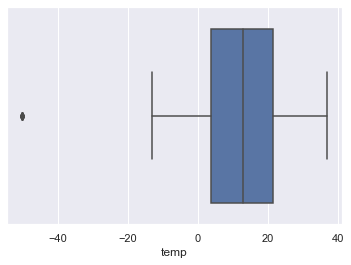

In [51]:
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
sns.boxplot(x=df['temp'])

In [13]:
file_name ="new_temperature.csv"
df.to_csv(file_name, encoding='utf-8')

In [14]:
gk = df.groupby('day') 
gd = gk.first() 
gd =gd.dropna()
gd.sort_values(by=['day'], axis=0)  

,hour,temp
day,,
1,0.0,8.100000
2,0.0,9.300000
3,0.0,9.700000
4,0.0,10.100000
5,0.0,9.000000
6,0.0,12.500000
7,0.0,14.900000
8,0.0,13.900000
9,0.0,14.500000


In [15]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

x = list(range(len(gd)))
plt.plot(x, gd['temp'], ':b', color='g')
plt.xlim(0, 5)
plt.ylim(15, 50);
plt.axis('tight');
plt.title("63_108")
plt.ylabel("Temp");

plt.show()


<Figure size 640x480 with 1 Axes>

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8784 entries, 0 to 8794
Data columns (total 3 columns):
day     8784 non-null int64
hour    8784 non-null float64
temp    8784 non-null float64
dtypes: float64(2), int64(1)
memory usage: 274.5 KB


In [17]:
df_temp = df['temp']
df_temp.describe()

count    8784.000000
mean       12.549966
std        10.702835
min       -50.000000
25%         3.800000
50%        12.900000
75%        21.500000
max        36.700001
Name: temp, dtype: float64

In [18]:
type(df_temp)

pandas.core.series.Series

In [19]:
df_temp.shape

(8784,)

특정 행(row) 얻기

In [20]:
df.loc[1]

day       1.0
hour    100.0
temp      8.8
Name: 1, dtype: float64

In [21]:
df.loc[0:2]

,day,hour,temp
0,1,0.0,8.1
1,1,100.0,8.8
2,1,200.0,8.3


In [22]:
df.loc[[1,4],['hour','temp']]

,hour,temp
1,100.0,8.8
4,400.0,9.5


In [23]:
df.loc[[0,2]]

,day,hour,temp
0,1,0.0,8.1
2,1,200.0,8.3


In [24]:
df.iloc[1]

day       1.0
hour    100.0
temp      8.8
Name: 1, dtype: float64

In [25]:
df.iloc[-1]

day       31.0
hour    2300.0
temp      10.9
Name: 8794, dtype: float64

In [26]:
df.iloc[[0,1,3,-1]]

,day,hour,temp
0,1,0.0,8.1
1,1,100.0,8.8
3,1,300.0,9.8
8794,31,2300.0,10.9


단일 값 얻기

In [27]:
df.loc[1, 'temp']

8.8

조건에 따른 행얻기

In [28]:
df.loc[df['temp'] <  -40]

,day,hour,temp
503,21,2300.0,-50.0
1891,18,1700.0,-50.0
2441,11,1400.0,-50.0
2973,2,1700.0,-50.0
3788,5,1500.0,-50.0
4322,27,2100.0,-50.0
7866,22,800.0,-50.0
8581,23,200.0,-50.0


In [29]:
gk = df.groupby('day') 

In [30]:
gk.first() 

,hour,temp
day,,
1,0.0,8.100000
2,0.0,9.300000
3,0.0,9.700000
4,0.0,10.100000
5,0.0,9.000000
6,0.0,12.500000
7,0.0,14.900000
8,0.0,13.900000
9,0.0,14.500000


In [31]:
gd = gk.first() 
gd =gd.dropna()
gd.sort_values(by=['day'], axis=0)  

,hour,temp
day,,
1,0.0,8.100000
2,0.0,9.300000
3,0.0,9.700000
4,0.0,10.100000
5,0.0,9.000000
6,0.0,12.500000
7,0.0,14.900000
8,0.0,13.900000
9,0.0,14.500000


In [32]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [33]:
x = list(range(len(df_temp)))

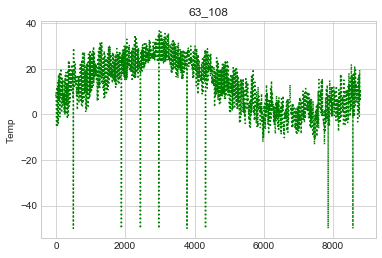

In [34]:
plt.plot(x, df_temp, ':b', color='g')
plt.xlim(0, 5)
plt.ylim(15, 50);
plt.axis('tight');
plt.title("63_108")
plt.ylabel("Temp");

plt.show()

TopN  과  Binning 추가 

In [35]:
df.nlargest(3, columns='temp')

,day,hour,temp
2985,3,500.0,36.700001
3032,5,400.0,36.200001
3031,5,300.0,36.000000


In [36]:
df.nsmallest(10, columns='temp')

,day,hour,temp
503,21,2300.0,-50.0
1891,18,1700.0,-50.0
2441,11,1400.0,-50.0
2973,2,1700.0,-50.0
3788,5,1500.0,-50.0
4322,27,2100.0,-50.0
7866,22,800.0,-50.0
8581,23,200.0,-50.0
7470,5,2000.0,-13.2
7471,5,2100.0,-13.2


abnormal : -100(미포함) 에서 -10(포함)     normal : -10(미포함)에서 40 

In [37]:
df_class = pd.cut(df['temp'], bins=[-100, -10, 40], labels=['abnormal', 'normal'])

In [38]:
df_class.head()

0    normal
1    normal
2    normal
3    normal
4    normal
Name: temp, dtype: category
Categories (2, object): [abnormal < normal]

In [39]:
df_class.count()

8784

In [40]:
df_class[df_class =='abnormal'].head()

503     abnormal
1891    abnormal
2441    abnormal
2973    abnormal
3788    abnormal
Name: temp, dtype: category
Categories (2, object): [abnormal < normal]

In [41]:
df_class[df_class =='abnormal'].index

Int64Index([ 503, 1891, 2441, 2973, 3788, 4322, 5978, 5979, 5980, 5981, 5982,
            6000, 6001, 6597, 6598, 7463, 7464, 7467, 7468, 7469, 7470, 7471,
            7472, 7489, 7490, 7491, 7758, 7759, 7760, 7866, 8581],
           dtype='int64')

In [42]:
df['class'] =df_class

In [43]:
df.columns

Index(['day', 'hour', 'temp', 'class'], dtype='object')

In [44]:
df[df['class'] == 'abnormal'].head()

,day,hour,temp,class
503,21,2300.0,-50.0,abnormal
1891,18,1700.0,-50.0,abnormal
2441,11,1400.0,-50.0,abnormal
2973,2,1700.0,-50.0,abnormal
3788,5,1500.0,-50.0,abnormal


In [45]:
df_normal = [x for x in df_temp if x > -20]

In [46]:
x = list(range(len(df_normal)))

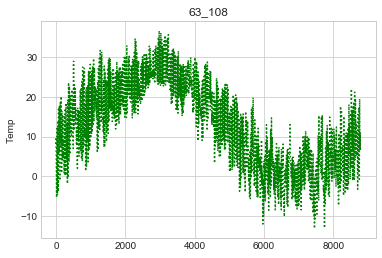

In [47]:
plt.plot(x, df_normal, ':b', color='g')
plt.xlim(0, 5)
plt.ylim(15, 50);
plt.axis('tight');
plt.title("63_108")
plt.ylabel("Temp");

plt.show()